### Import Dependencies

In [1]:
# Dependencies and Setup
%matplotlib inline
from spotify_client import *
import pandas as pd
import numpy as np
import numpy
import matplotlib.pyplot as plt
from matplotlib import figure
from matplotlib import rcParams 
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import matplotlib.patches as mpatches
import matplotlib
import plotly_express as ex
import joypy
import seaborn as sns
import requests
import time
import scipy.stats as st
import math
from math import pi
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
import string
import random
import glob
import os
import io
import squarify

In [2]:
client_id = 'Please enter Spotify Client ID'
client_secret = 'Please enter Spotify Client Secret'

### Import and read files

In [3]:
# Import files
spotify2019_df = pd.read_csv('resources/spotify_2019.csv', encoding = 'utf-8')
spotify2020_df = pd.read_csv('resources/Spotify_2020.csv', encoding = 'utf-8')
spotify2021_df = pd.read_csv('resources/spotify_2021_.csv', encoding = 'ISO-8859-1')
spotify2019_april_df = pd.read_csv('resources/spotify_april_2019.csv', encoding = 'utf-8')
spotify2020_april_df = pd.read_csv('resources/spotify_april_2020.csv', encoding = 'utf-8')
spotify2020_sweden_df = pd.read_csv('resources/sweden_2020.csv', encoding = 'utf-8')
spotify2020_italy_df = pd.read_csv('resources/italy_2020.csv', encoding = 'utf-8')

In [4]:
# Combine April Month for 2019 and 2020
spotify2019_df = pd.concat([spotify2019_df, spotify2019_april_df])
spotify2020_df = pd.concat([spotify2020_df, spotify2020_april_df])

### User defined functions

In [39]:
#---------------------------------------------------------------#
#                 Spotify API related functions                 #
#---------------------------------------------------------------#

# Make Spotify API calls and extract data
def call_api (df):
    df['*Artist Name'] = ""
    df['Artist ID'] = ""
    df['Artist Followers'] = ""
    df['Artist Genre'] = ""
    df['Artist Popularity'] = ""
    df['*Track Name'] = ""
    df['Track ID'] = ""
    df['Track Duration (ms)'] = ""
    df['Track Popularity'] = ""
    df['Album Name'] = ""
    df['Album ID'] = ""
    df['Album Released Date'] = ""
    df['Album Total Tracks'] = ""
    df['Acousticness'] = ""
    df['Danceability'] = ""
    df['Energy'] = ""
    df['Instrumentalness'] = ""
    df['Key'] = ""
    df['Liveness'] = ""
    df['Loudness'] = ""
    df['Mode'] = ""
    df['Speechiness'] = ""
    df['Tempo'] = ""
    df['Time Signature'] = ""
    df['Valence'] = ""
    NA = 'N/A'
    
    for index, row in df.iterrows():
        search_results = spotify.search({'track':row['Track Name'], 
                                         'artist':row['Artist']
                                         },
                                        search_type='track')
        try:
            # Append values into a list
            # Artist info
            artist_name = search_results['tracks']['items'][0]['artists'][0]['name']
            artist_id = search_results['tracks']['items'][0]['artists'][0]['id']

            # Track info
            track_name = search_results['tracks']['items'][0]['name']
            track_id = search_results['tracks']['items'][0]['id']
            track_duration_ms = search_results['tracks']['items'][0]['duration_ms']
            track_popularity = search_results['tracks']['items'][0]['popularity']

            # Album info
            album_name = search_results['tracks']['items'][0]['album']['name']
            album_id = search_results['tracks']['items'][0]['album']['id']
            album_released_date = search_results['tracks']['items'][0]['album']['release_date']
            album_total_tracks = search_results['tracks']['items'][0]['album']['total_tracks']

            # Extra artist info when searched with artist_id
            artist_results = spotify.get_artist(artist_id)
            artist_followers = artist_results['followers']['total']
            artist_genre = artist_results['genres'][0] #Output usually 3, just picking first one
            artist_popularity = artist_results['popularity']
            
            # Audio features
            audio_features = spotify.get_audio_features(track_id)
            acousticness = audio_features['acousticness']
            danceability = audio_features['danceability']
            energy = audio_features['energy']
            instrumentalness = audio_features['instrumentalness']
            key = audio_features['key']
            liveness = audio_features['liveness']
            loudness = audio_features['loudness']
            mode = audio_features['mode']
            speechiness = audio_features['speechiness']
            tempo = audio_features['tempo']
            time_signature = audio_features['time_signature']
            valence = audio_features['valence']

            df.loc[index, '*Artist Name'] = artist_name
            df.loc[index, 'Artist ID'] = artist_id
            df.loc[index, 'Artist Followers'] = artist_followers
            df.loc[index, 'Artist Genre'] = artist_genre
            df.loc[index, 'Artist Popularity'] = artist_popularity 
            df.loc[index, '*Track Name'] = track_name
            df.loc[index, 'Track ID'] = track_id
            df.loc[index, 'Track Duration (ms)'] = track_duration_ms
            df.loc[index, 'Track Popularity'] = track_popularity
            df.loc[index, 'Album Name'] = album_name
            df.loc[index, 'Album ID'] = album_id
            df.loc[index, 'Album Released Date'] = album_released_date
            df.loc[index, 'Album Total Tracks'] = album_total_tracks
            df.loc[index, 'Acousticness'] = acousticness
            df.loc[index, 'Danceability'] = danceability
            df.loc[index, 'Energy'] = energy
            df.loc[index, 'Instrumentalness'] = instrumentalness
            df.loc[index, 'Key'] = key
            df.loc[index, 'Liveness'] = liveness
            df.loc[index, 'Loudness'] = loudness
            df.loc[index, 'Mode'] = mode
            df.loc[index, 'Speechiness'] = speechiness
            df.loc[index, 'Tempo'] = tempo
            df.loc[index, 'Time Signature'] = time_signature
            df.loc[index, 'Valence'] = valence

        except:
            df.loc[index, '*Artist Name'] = NA
            df.loc[index, 'Artist ID'] = NA
            df.loc[index, 'Artist Followers'] = NA
            df.loc[index, 'Artist Genre'] = NA
            df.loc[index, 'Artist Popularity'] = NA 
            df.loc[index, '*Track Name'] = NA
            df.loc[index, 'Track ID'] = NA
            df.loc[index, 'Track Duration (ms)'] = NA
            df.loc[index, 'Track Popularity'] = NA
            df.loc[index, 'Album Name'] = NA
            df.loc[index, 'Album ID'] = NA
            df.loc[index, 'Album Released Date'] = NA
            df.loc[index, 'Album Total Tracks'] = NA
            df.loc[index, 'Acousticness'] = NA
            df.loc[index, 'Danceability'] = NA
            df.loc[index, 'Energy'] = NA
            df.loc[index, 'Instrumentalness'] = NA
            df.loc[index, 'Key'] = NA
            df.loc[index, 'Liveness'] = NA
            df.loc[index, 'Loudness'] = NA
            df.loc[index, 'Mode'] = NA
            df.loc[index, 'Speechiness'] = NA
            df.loc[index, 'Tempo'] = NA
            df.loc[index, 'Time Signature'] = NA
            df.loc[index, 'Valence'] = NA
            pass
    
    return df


# Function to go through N/A values and attempt to get results
def call_api_na (df):
    NA = 'N/A'
    counter=0   
    for index, row in df.iterrows():

        if row['*Artist Name'] == 'N/A':
            search_results = spotify.search({'track':row['Track Name'], 
                                             'artist':row['Artist'],
                                             },
                                             search_type='track')
            
            # If nothing is found check different track name
            if search_results['tracks']['total'] == 0:
                search_results = spotify.search({'track':row['Track Name'][:8],
                                                 'artist':row['Artist']
                                                 },
                                                 search_type='track')
            
            
            try:
                # Append values into a list
                # Artist info
                artist_name = search_results['tracks']['items'][0]['artists'][0]['name']
                artist_id = search_results['tracks']['items'][0]['artists'][0]['id']

                # Track info
                track_name = search_results['tracks']['items'][0]['name']
                track_id = search_results['tracks']['items'][0]['id']
                track_duration_ms = search_results['tracks']['items'][0]['duration_ms']
                track_popularity = search_results['tracks']['items'][0]['popularity']

                # Album info
                album_name = search_results['tracks']['items'][0]['album']['name']
                album_id = search_results['tracks']['items'][0]['album']['id']
                album_released_date = search_results['tracks']['items'][0]['album']['release_date']
                album_total_tracks = search_results['tracks']['items'][0]['album']['total_tracks']

                # Extra artist info when searched with artist_id
                artist_results = spotify.get_artist(artist_id)
                artist_followers = artist_results['followers']['total']
                artist_genre = artist_results['genres'][0] #Output usually 3, just picking first one
                artist_popularity = artist_results['popularity']

                # Audio features
                audio_features = spotify.get_audio_features(track_id)
                acousticness = audio_features['acousticness']
                danceability = audio_features['danceability']
                energy = audio_features['energy']
                instrumentalness = audio_features['instrumentalness']
                key = audio_features['key']
                liveness = audio_features['liveness']
                loudness = audio_features['loudness']
                mode = audio_features['mode']
                speechiness = audio_features['speechiness']
                tempo = audio_features['tempo']
                time_signature = audio_features['time_signature']
                valence = audio_features['valence']

                df.loc[index, '*Artist Name'] = artist_name
                df.loc[index, 'Artist ID'] = artist_id
                df.loc[index, 'Artist Followers'] = artist_followers
                df.loc[index, 'Artist Genre'] = artist_genre
                df.loc[index, 'Artist Popularity'] = artist_popularity 
                df.loc[index, '*Track Name'] = track_name
                df.loc[index, 'Track ID'] = track_id
                df.loc[index, 'Track Duration (ms)'] = track_duration_ms
                df.loc[index, 'Track Popularity'] = track_popularity
                df.loc[index, 'Album Name'] = album_name
                df.loc[index, 'Album ID'] = album_id
                df.loc[index, 'Album Released Date'] = album_released_date
                df.loc[index, 'Album Total Tracks'] = album_total_tracks
                df.loc[index, 'Acousticness'] = acousticness
                df.loc[index, 'Danceability'] = danceability
                df.loc[index, 'Energy'] = energy
                df.loc[index, 'Instrumentalness'] = instrumentalness
                df.loc[index, 'Key'] = key
                df.loc[index, 'Liveness'] = liveness
                df.loc[index, 'Loudness'] = loudness
                df.loc[index, 'Mode'] = mode
                df.loc[index, 'Speechiness'] = speechiness
                df.loc[index, 'Tempo'] = tempo
                df.loc[index, 'Time Signature'] = time_signature
                df.loc[index, 'Valence'] = valence         

            except:
                df.loc[index, '*Artist Name'] = NA
                df.loc[index, 'Artist ID'] = NA
                df.loc[index, 'Artist Followers'] = NA
                df.loc[index, 'Artist Genre'] = NA
                df.loc[index, 'Artist Popularity'] = NA 
                df.loc[index, '*Track Name'] = NA
                df.loc[index, 'Track ID'] = NA
                df.loc[index, 'Track Duration (ms)'] = NA
                df.loc[index, 'Track Popularity'] = NA
                df.loc[index, 'Album Name'] = NA
                df.loc[index, 'Album ID'] = NA
                df.loc[index, 'Album Released Date'] = NA
                df.loc[index, 'Album Total Tracks'] = NA
                df.loc[index, 'Acousticness'] = NA
                df.loc[index, 'Danceability'] = NA
                df.loc[index, 'Energy'] = NA
                df.loc[index, 'Instrumentalness'] = NA
                df.loc[index, 'Key'] = NA
                df.loc[index, 'Liveness'] = NA
                df.loc[index, 'Loudness'] = NA
                df.loc[index, 'Mode'] = NA
                df.loc[index, 'Speechiness'] = NA
                df.loc[index, 'Tempo'] = NA
                df.loc[index, 'Time Signature'] = NA
                df.loc[index, 'Valence'] = NA
                pass

    return df



#---------------------------------------------------------------#
#     Data verification and organization related functions      #
#---------------------------------------------------------------#

# Include only important columns to be exported in csv
def clean_data(df):       
    df = df[['Position', 'Track Name', 'Artist', 'Streams', 'Week', 'Month',
             'Year', 'Artist Followers', 'Artist Genre', 'Artist Popularity',
             'Track Popularity', 'Track Duration (ms)', 'Album Name', 'Album Total Tracks', 
             'Album Released Date', 'Acousticness', 'Danceability', 'Energy', 'Instrumentalness', 
             'Key', 'Liveness', 'Loudness', 'Mode', 'Speechiness', 'Tempo', 'Time Signature', 'Valence']]
    return df

# Remove character from Track Name and Artist to avoid search issues
def remove_characters(df):
    df[['Track Name', 'Artist']] = df[['Track Name', 'Artist']].replace({"'":""}, regex=True)
    return df

# Count N/A values in Data Frame
def count_na(df):
    #Count N/A values in Data Frame
    counter = 0
    for value in df['*Artist Name']:
        if value == 'N/A':
            counter +=1
    return counter

# Check if Artist Names match
def name_check(df):    
    for index, row in df.iterrows():
        if row['Artist'] == row['*Artist Name']:
            df['Artist Check'] = 'True'
        else:
            df['Artist Check'] = 'False'

    #Count False Artist values
    counter = 0
    for value in df['Artist Check']:
        if value == 'False':
            counter +=1
    return counter

#Check if Track Names match
def track_check(df):
    for index, row in df.iterrows():
        if row['Track Name'] == row['*Track Name']:
            df['Track Check'] = 'True'
        else:
            df['Track Check'] = 'False'

    #Count False Track values
    counter = 0
    for value in df['Track Check']:
        if value == 'False':
            counter +=1
    return counter



#---------------------------------------------------------------#
#                Different Plots related functions              #
#---------------------------------------------------------------#

# Function to generate three Radar Charts
def radar_plot(group,*args):
    count = 1
    nplots = len(args)  
    
    for df in args:
        x = 5
        color = f"#{random.randrange(0x1000000):06x}"
        name = ([x for x in globals() if globals()[x] is df][0])
        name = string.capwords(name.replace("_", " "))
        if group == True:
            df = df.groupby(['Week', 'Month']).mean()
            x = 1
                
        fig = plt.figure(figsize=(16,16))
#         ax = plt.subplot((220 + count), polar='True')
        ax = plt.subplot(polar='True')

        categories = df.iloc[0,x:].index.tolist()
        N = len(categories)

        for xx in range(len(df)):
            values = df[['Acousticness', 'Danceability', 'Energy', 
                                'Valence', 'Speechiness', 'Liveness', 'Instrumentalness']].iloc[xx].values.tolist()
            angles = [n / float(N) * 2 * pi for n in  range(N)]

            try:
                values = values + [df[['Acousticness', 'Danceability', 'Energy', 
                                'Valence', 'Speechiness', 'Liveness', 'Instrumentalness']].iloc[xx+1].values[0]]
                angles += angles[:1]
            except:
                continue
                
            # xticks
            plt.xticks(angles[:-1], categories)
            for label,i in zip(ax.get_xticklabels(),range(0,len(angles))):
                angle_rad=angles[i]
                if angle_rad <= pi/2:
                    ha= 'left'
                    va= "bottom"

                elif pi/2 < angle_rad <= pi:
                    ha= 'right'
                    va= "bottom"

                elif pi < angle_rad <= (3*pi/2):
                    ha= 'right'
                    va= "top"  

                elif (11*pi/6) > angle_rad > (5*pi/3):
                    ha= 'left'
                    va= "bottom" 

                else:
                    ha= 'right'
                    va= "bottom"

                label.set_verticalalignment(va)
                label.set_horizontalalignment(ha)    
                

            plt.polar(angles, values, alpha=0.5, lw=1, color=color)

            # xticks
            plt.xticks(angles[:-1], categories)


        # yticks
        ax.set_rlabel_position(0)
        plt.yticks([0.25,0.50,0.75], color='grey', size=10)
        plt.ylim(0,1)

        plt.fill(angles, values, alpha=0.3, color = color)

        title = f"Audio features for {name}"
        plt.title(title)
        plt.savefig('output_plots/Radar_plot'+str(count)+'.png')
        count += 1

    plt.show()

# Function to generate Density Plot 
def density_plot(df, df2, df3, month1, month2, month3, label1, label2, label3, audiofeat, title):
#     count += 1 
    # Draw Plot
    plt.figure(figsize=(16,10), dpi= 80)
    sns.kdeplot(df.loc[df['Month'] == month1, audiofeat], shade=True, color="g", label=label1, alpha=.7)
    sns.kdeplot(df2.loc[df2['Month'] == month2, audiofeat], shade=True, color="deeppink", label=label2, alpha=.7)
    sns.kdeplot(df3.loc[df3['Month'] == month3, audiofeat], shade=True, color="dodgerblue", label=label3, alpha=.7)

    # Decoration
    plt.title(title, fontsize=22)
    plt.legend()
    plt.savefig('output_plots/'+ title + '.png')
    plt.show()

### API Calls section

In [6]:
# Generate Spotify API token to make calls
spotify = SpotifyAPI(client_id, client_secret)

# Make a copy of main Data Frames
spotify19_df = spotify2019_df.copy()
spotify20_df = spotify2020_df.copy()
spotify21_df = spotify2021_df.copy()
spotify_sweden_df = spotify2020_sweden_df.copy()
spotify_italy_df = spotify2020_italy_df.copy()

# Remove unwanted character from all dataframes
spotify19_df = remove_characters(spotify19_df)
spotify20_df = remove_characters(spotify20_df)
spotify21_df = remove_characters(spotify21_df)
spotify_sweden_df = remove_characters(spotify_sweden_df)
spotify_italy_df = remove_characters(spotify_italy_df)

In [7]:
# Spotify 2019 Data / API Call
spotify19_df = call_api(spotify19_df)

In [8]:
# Spotify 2020 Data / API Call
spotify20_df = call_api(spotify20_df)

In [9]:
# Spotify 2021 Data / API Call
spotify21_df = call_api(spotify21_df)

In [10]:
# Spotify Sweden 2020 Data / API Call
spotify_sweden_df = call_api(spotify_sweden_df)

In [11]:
# Spotify Italy 2020 Data / API Call
spotify_italy_df = call_api(spotify_italy_df)

In [12]:
# Count N/A values Before in each Data Frame
na_19 = count_na(spotify19_df)
na_20 = count_na(spotify20_df)
na_21 = count_na(spotify21_df)
na_sweden = count_na(spotify_sweden_df)
na_italy = count_na(spotify_italy_df)

print(f"Spotify 2019 has {na_19} N/A value / Spotify 2020 has {na_20} N/A value / Spotify 2021 has {na_21} N/A value")
print(f"Spotify Sweden 2020 has {na_sweden} N/A value / Spotify Italy 2020 has {na_italy} N/A value")

Spotify 2019 has 58 N/A value / Spotify 2020 has 58 N/A value / Spotify 2021 has 64 N/A value
Spotify Sweden 2020 has 171 N/A value / Spotify Italy 2020 has 103 N/A value


In [13]:
# Loop through N/A values in second API call
for number in range(50):
    spotify19_df = call_api_na(spotify19_df)
    spotify20_df = call_api_na(spotify20_df)
    spotify21_df = call_api_na(spotify21_df)
    spotify_sweden_df = call_api_na(spotify_sweden_df)
    spotify_italy_df = call_api_na(spotify_italy_df)

In [14]:
# Count N/A values After in each Data Frame
na_19 = count_na(spotify19_df)
na_20 = count_na(spotify20_df)
na_21 = count_na(spotify21_df)
na_sweden = count_na(spotify_sweden_df)
na_italy = count_na(spotify_italy_df)

print(f"Spotify 2019 has {na_19} N/A value / Spotify 2020 has {na_20} N/A value / Spotify 2021 has {na_21} N/A value")
print(f"Spotify Sweden 2020 has {na_sweden} N/A value / Spotify Italy 2020 has {na_italy} N/A value")

Spotify 2019 has 9 N/A value / Spotify 2020 has 33 N/A value / Spotify 2021 has 47 N/A value
Spotify Sweden 2020 has 112 N/A value / Spotify Italy 2020 has 55 N/A value


In [15]:
# Replace N/A to NaN
spotify19_df_na = spotify19_df.replace('N/A', np.nan)
spotify20_df_na = spotify20_df.replace('N/A', np.nan)
spotify21_df_na = spotify21_df.replace('N/A', np.nan)
spotify_sweden_df_na = spotify_sweden_df.replace('N/A', np.nan)
spotify_italy_df_na = spotify_italy_df.replace('N/A', np.nan)

# Drop NaN rows
spotify19_df_na = spotify19_df_na.dropna().reset_index(drop=True)
spotify20_df_na = spotify20_df_na.dropna().reset_index(drop=True)
spotify21_df_na = spotify21_df_na.dropna().reset_index(drop=True)
spotify_sweden_df_na = spotify_sweden_df_na.dropna().reset_index(drop=True)
spotify_italy_df_na = spotify_italy_df_na.dropna().reset_index(drop=True)

In [16]:
# Check if Artist Names match
name_19 = name_check(spotify19_df_na)
name_20 = name_check(spotify20_df_na)
name_21 = name_check(spotify21_df_na)
name_sweden = name_check(spotify_sweden_df_na)
name_italy = name_check(spotify_italy_df_na)

#Check if Track Names match
track_19 = track_check(spotify19_df_na)
track_20 = track_check(spotify20_df_na)
track_21 = track_check(spotify21_df_na)
track_sweden = track_check(spotify_sweden_df_na)
track_italy = track_check(spotify_italy_df_na)

print(f"Artists in 2019 returned {name_19} unmatched rows / Artists in 2020 returned {name_20} unmatched rows / Artists in 2021 returned {name_21} unmatched rows")
print(f"Tracks in 2019 returned {track_19} unmatched rows / Tracks in 2020 returned {track_20} unmatched rows / Tracks in 2021 returned {track_21} unmatched rows")
print(f"Artists in Sweden 2020 returned {name_sweden} unmatched rows / Artists in Italy 2020 returned {name_italy} unmatched rows")
print(f"Tracks in Sweden 2020 returned {track_sweden} unmatched rows / Tracks in Italy 2020 returned {track_italy} unmatched rows")

Artists in 2019 returned 0 unmatched rows / Artists in 2020 returned 0 unmatched rows / Artists in 2021 returned 0 unmatched rows
Tracks in 2019 returned 10391 unmatched rows / Tracks in 2020 returned 0 unmatched rows / Tracks in 2021 returned 0 unmatched rows
Artists in Sweden 2020 returned 0 unmatched rows / Artists in Italy 2020 returned 0 unmatched rows
Tracks in Sweden 2020 returned 0 unmatched rows / Tracks in Italy 2020 returned 0 unmatched rows


In [17]:
# Removed unnecessary columns from Data Frames
# Spotify 2019 Data / Including only needed columns
original_spotify19_df = clean_data(spotify19_df_na)

# Spotify 2020 Data / Including only needed columns
original_spotify20_df = clean_data(spotify20_df_na)

# Spotify 2021 Data / Including only needed columns
original_spotify21_df = clean_data(spotify21_df_na)

# Spotify Sweden 2019 Data / Including only needed columns
original_spotify_sweden_df = clean_data(spotify_sweden_df_na)

# Spotify Italy 2020 Data / Including only needed columns
original_spotify_italy_df = clean_data(spotify_italy_df_na)

#### Export files with Spotify API data

In [18]:
# Export csv files with Spotify API data
# Export 2019 updated csv file
original_spotify19_df.to_csv('output_data/Original_Spotify2019_Updated_2-20-21.csv', index=False, header=True)

# Export 2020 updated csv file
original_spotify20_df.to_csv('output_data/Original_Spotify2020_Updated_2-20-21.csv', index=False, header=True)

# Export 2021 updated csv file
original_spotify21_df.to_csv('output_data/Original_Spotify2021_Updated_2-20-21.csv', index=False, header=True)

# Export Sweden 2020 updated csv file
original_spotify_sweden_df.to_csv('output_data/Spotify_Sweden_2020_Updated_2-20-21.csv', index=False, header=True)

# Export Italy 2020 updated csv file
original_spotify_italy_df.to_csv('output_data/Spotify_Italy_2020_Updated_2-20-21.csv', index=False, header=True)

# Plots

### Total Streams Plots

In [19]:
# Making a copy of Data Frames
#2019 CSV
sd_2019_df = spotify2019_df.copy()

#2020 CSV to DF
sd_2020_df = spotify2020_df.copy()

#combined csvs
sd_combined_df = pd.concat([sd_2019_df, sd_2020_df])

#stream by year
sum_2020 = sd_2020_df.groupby("Year")["Streams"].sum()
sum_2019 = sd_2019_df.groupby("Year")["Streams"].sum()

#streams by year
sum_by_year_df = sd_combined_df.groupby("Year")["Streams"].sum()

stream_delta = (sum_2020 - sum_2019)

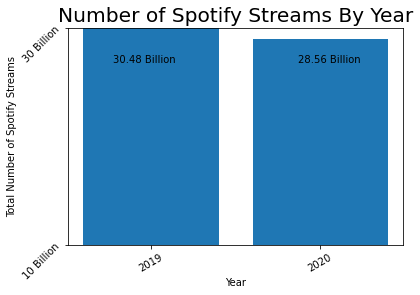

In [20]:
#---------------------------------------#
#        Bar Plot Streams per year      #
#---------------------------------------#

fig, ax1 = plt.subplots(1,1)
fig.text(.30,.76, "30.48 Billion", ha = "center");
fig.text(.73,.76, "28.56 Billion", ha = "center");
x1 = [0,1,2,3]
label_number = ['10 Billion','30 Billion']
ax1.set_yticks(x1)
ax1.set_yticklabels(label_number, minor=False, rotation=45)

#style
plt.style.use("fivethirtyeight")

#Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#x axis
x_axis = sd_combined_df["Year"].unique()
plt.title("Number of Spotify Streams By Year")
plt.xlabel("Year")

#y axis
y_axis = sum_by_year_df
plt.ylabel("Total Number of Spotify Streams")
fig, ax = plt.bar(x_axis, y_axis)

#ticks and rotation
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation = "30")
rcParams["figure.figsize"]= 5, 7
plt.ylim(1000000000,30000000000)
plt.yticks([1000000000,30000000000])
ax.figure.savefig('output_plots/Bar_plot_yearly.png')
plt.show()

In [21]:
#streams by month 2019 vs 2020
new_sd_2019_df = sd_2019_df.groupby("Month")["Streams"].sum()
new_sd_2019_df.index = pd.CategoricalIndex(new_sd_2019_df.index, categories=['Previous December','January', 'February', 'March', 'April','May','June', 'July', 'August','September', 'October', 'November', 'December'], ordered=True)
new_sd_2019_df = new_sd_2019_df.sort_index()
new_sd_2020_df = sd_2020_df.groupby("Month")["Streams"].sum()
new_sd_2020_df = new_sd_2020_df

#sort months by categorical index
new_sd_2020_df.index = pd.CategoricalIndex(new_sd_2020_df.index, categories=['Previous December','January', 'February', 'March', 'April','May','June', 'July', 'August','September', 'October', 'November', 'December'], ordered=True)
new_sd_2020_df = new_sd_2020_df.sort_index()

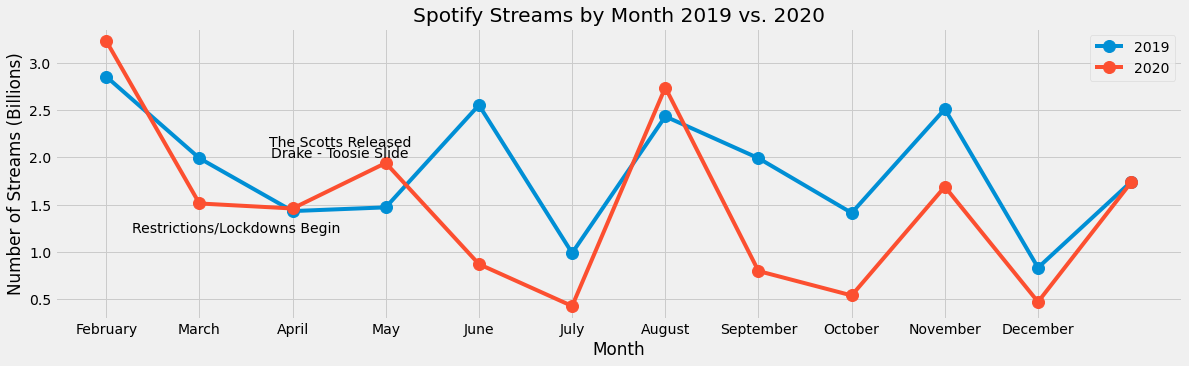

In [23]:
#---------------------------------------#
#    line plot 2019 vs 2020 by month    #
#---------------------------------------#
fig, ax = plt.subplots()
#April Text
fig.text(.3,.52, "Drake - Toosie Slide", ha = "center");
fig.text(.3,.55, "The Scotts Released", ha = "center");

#may 2019 text
fig.text(.22,.31, "Restrictions/Lockdowns Begin", ha = "center");
plt.style.use("fivethirtyeight")
plt.plot(new_sd_2019_df, markersize=12, marker="o")
plt.plot(new_sd_2020_df, markersize=12, marker="o")
plt.legend([2019, 2020])
stream_label = np.arange(0, 4, .5)
ax.set_yticklabels(stream_label)
rcParams["figure.figsize"]= 18, 5

#title and axis labels
plt.title("Spotify Streams by Month 2019 vs. 2020")
plt.xlabel("Month")
plt.ylabel("Number of Streams (Billions)");
fig.savefig('output_plots/Line_plot_2019vs2020.png')
plt.show()

### Genres Plots

In [24]:
# find unique data - artists/track/genre 2019
unique_artists19 = spotify2019_df['Artist'].unique()
print(f'Total unique artists: {len(unique_artists19)}')

unique_tracks19 = spotify2019_df['Track Name'].unique()
print(f'Total unique tracks: {len(unique_tracks19)}')

Total unique artists: 332
Total unique tracks: 1140


In [25]:
# find unique data - artists/track/genre 2020
unique_artists20 = spotify2020_df['Artist'].unique()
print(f'Total unique artists: {len(unique_artists20)}')

unique_tracks20 = spotify2020_df['Track Name'].unique()
print(f'Total unique tracks: {len(unique_tracks20)}')

Total unique artists: 356
Total unique tracks: 1304


In [26]:
# 2019 genre variable
genres19 = original_spotify19_df
genres19.drop_duplicates(subset = 'Track Name', keep = False, inplace = True)

# 2020 genre variable
genres20 = original_spotify20_df
genres20.drop_duplicates(subset = 'Track Name', keep = False, inplace = True)

C:\Users\gucas\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\gucas\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



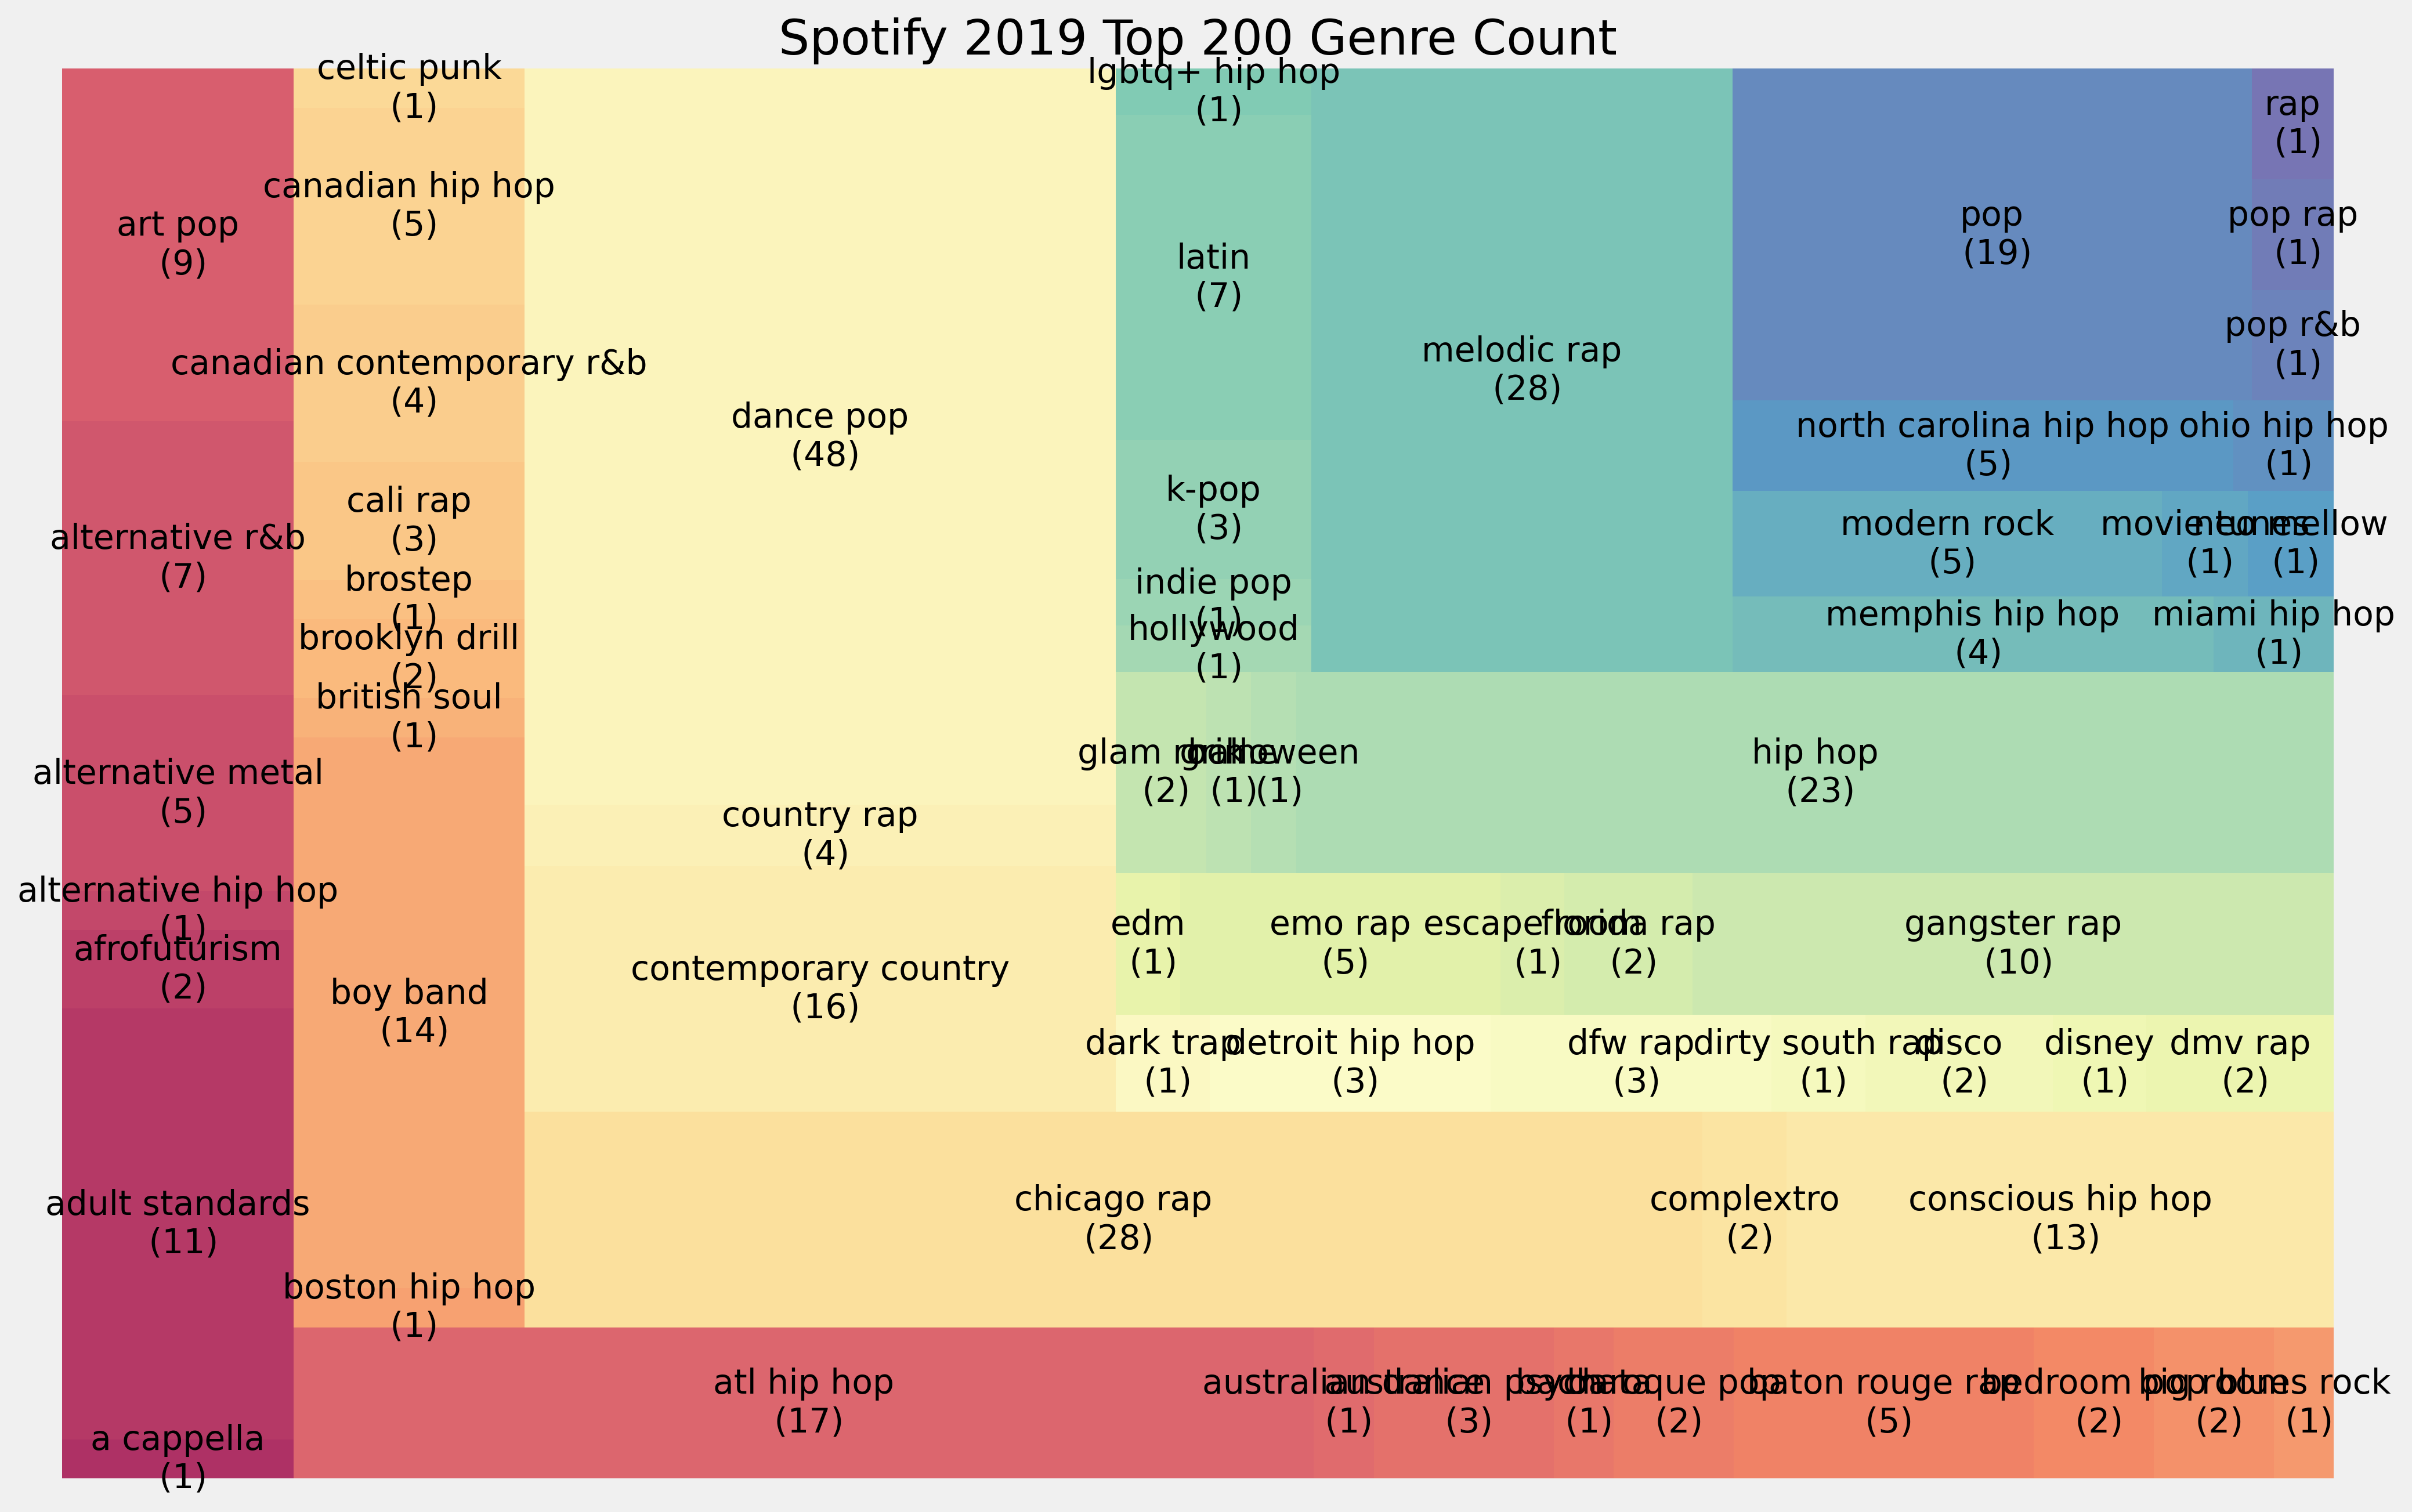

In [27]:
#---------------------------------------#
#        2019 genre treemapping         #
#---------------------------------------#
# prep data
df = genres19.groupby('Artist Genre').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# draw plot
plt.figure(figsize=(15,10), dpi= 300)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# set plot and save fig
plt.title('Spotify 2019 Top 200 Genre Count')
plt.axis('off')
plt.savefig('output_plots/2019genre.png')
plt.show()

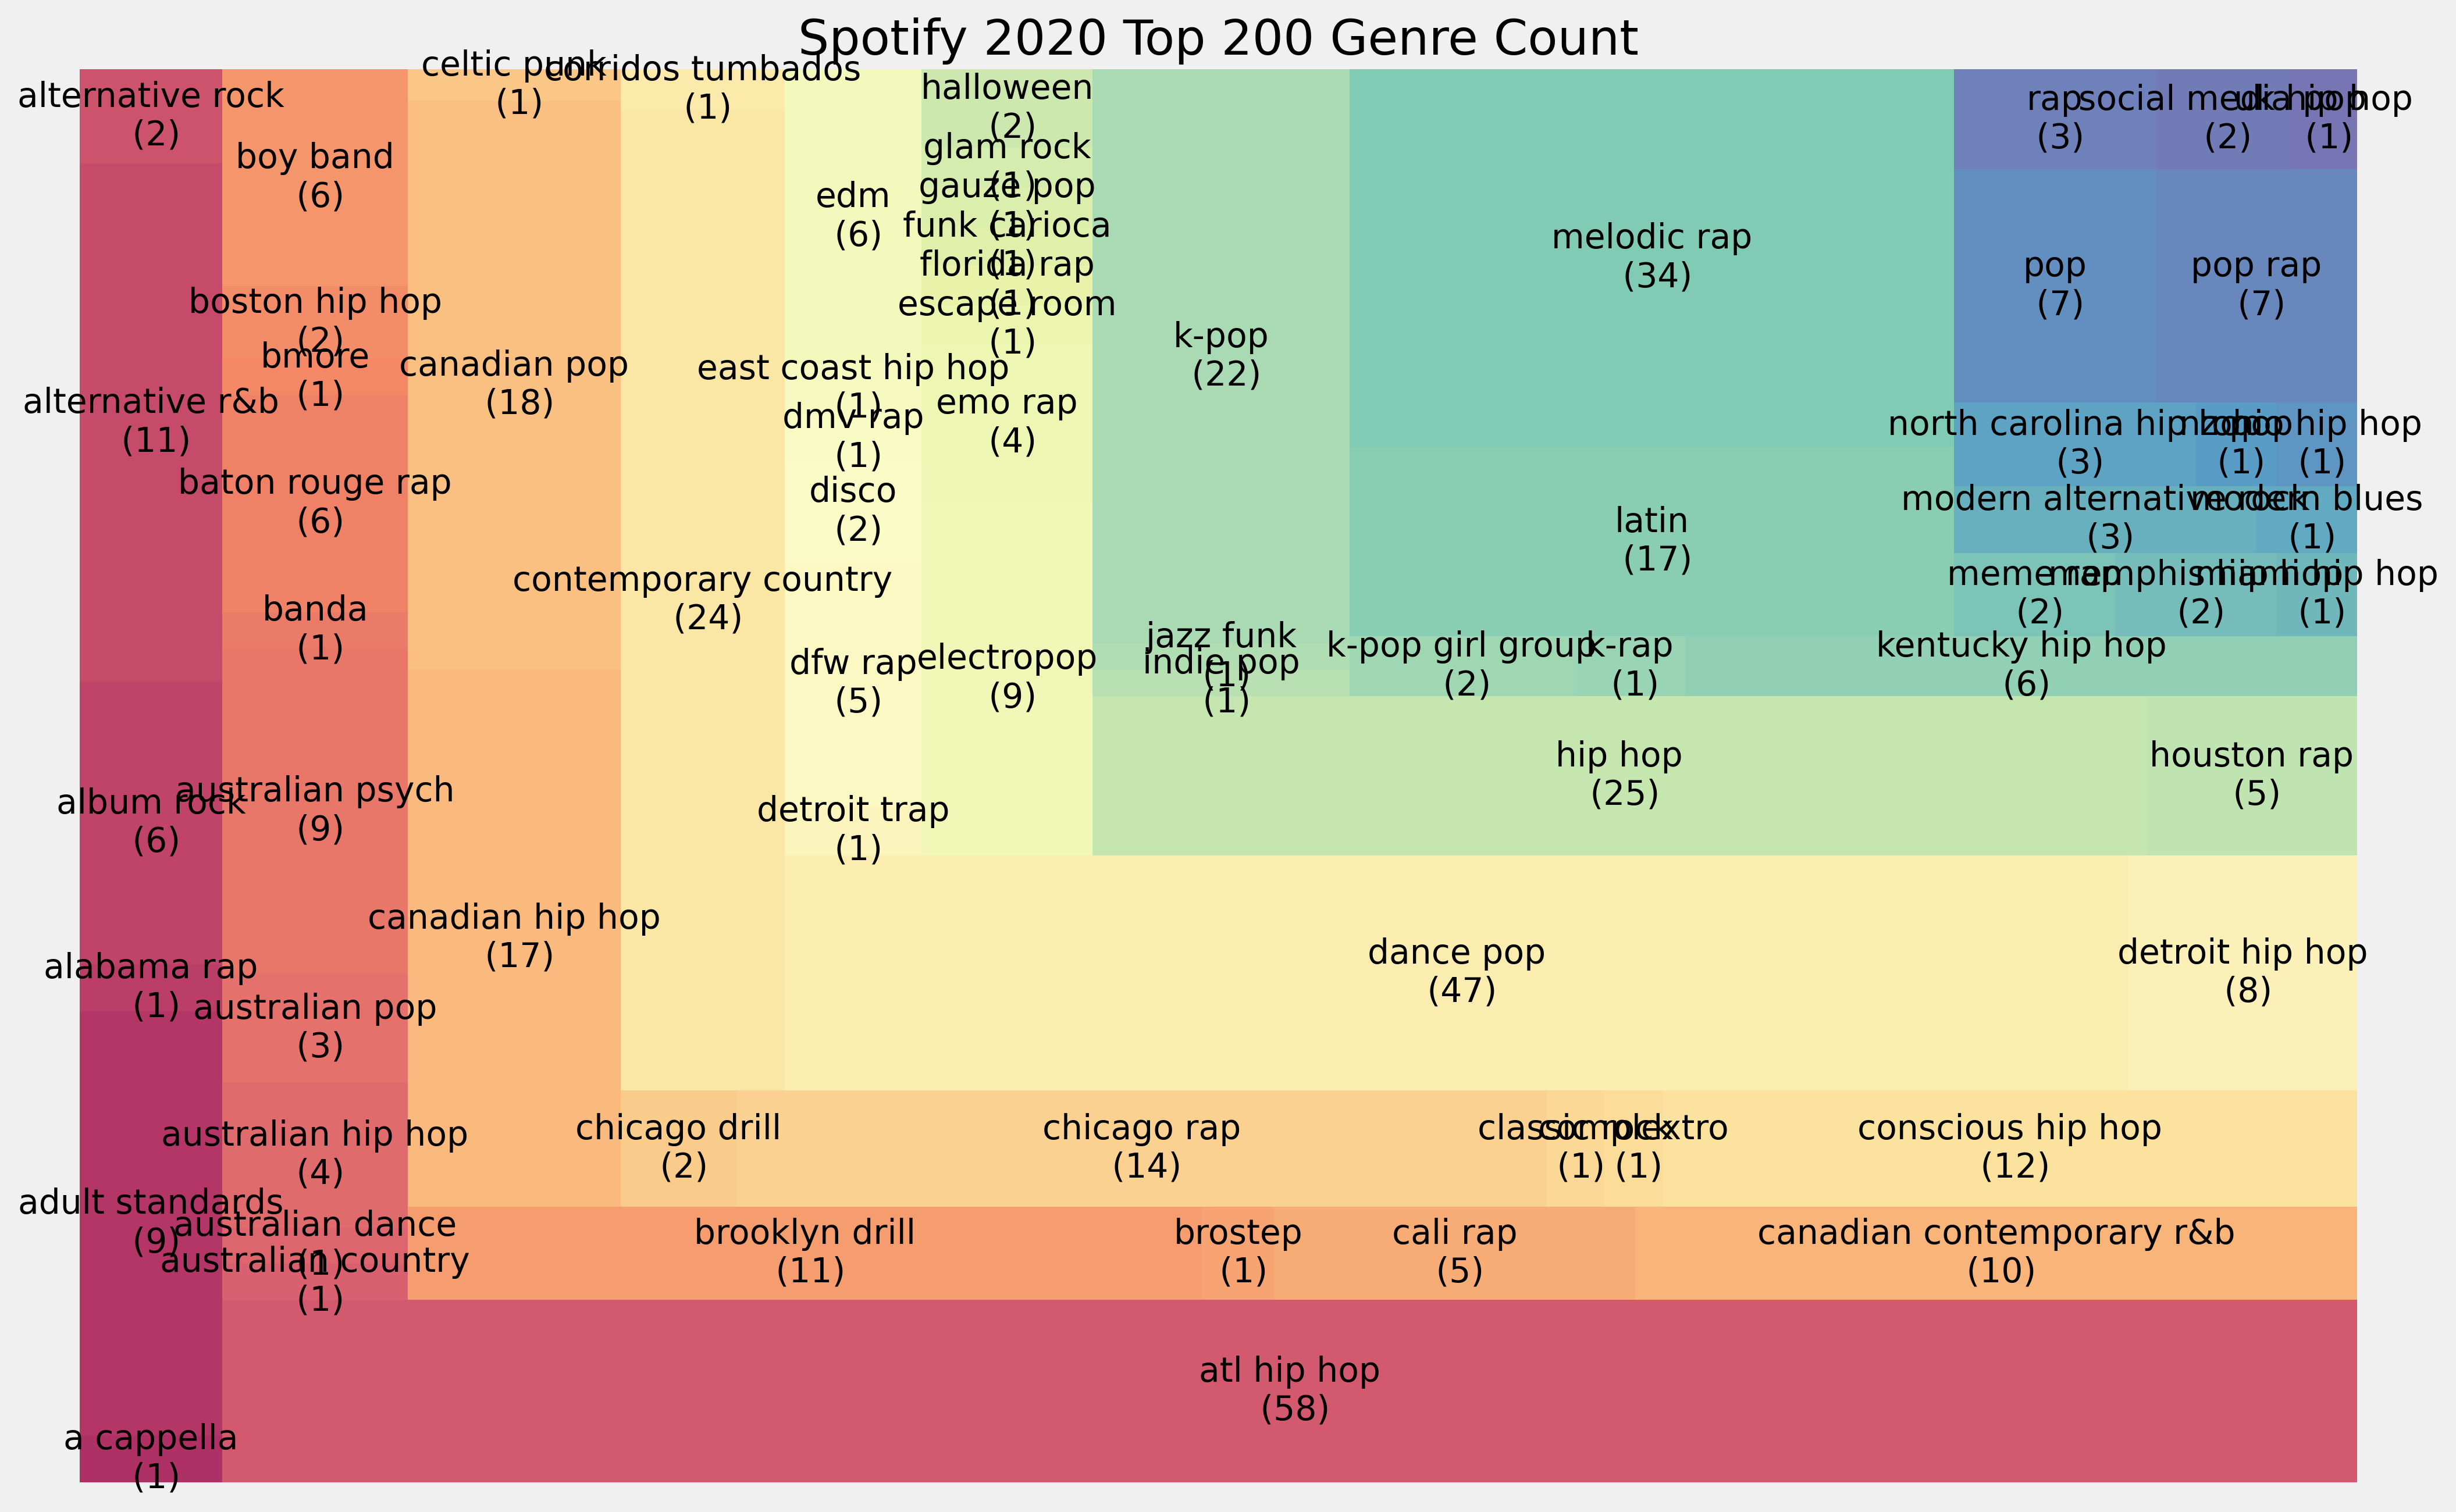

In [28]:
#---------------------------------------#
#        2020 genre treemapping         #
#---------------------------------------#
# prep data
df = genres20.groupby('Artist Genre').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# draw plot
plt.figure(figsize=(15,10), dpi= 300)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# set plot and save fig
plt.title('Spotify 2020 Top 200 Genre Count')
plt.axis('off')
plt.savefig('output_plots/2020genre.png')
plt.show()

### USA Audio Analysis Plots

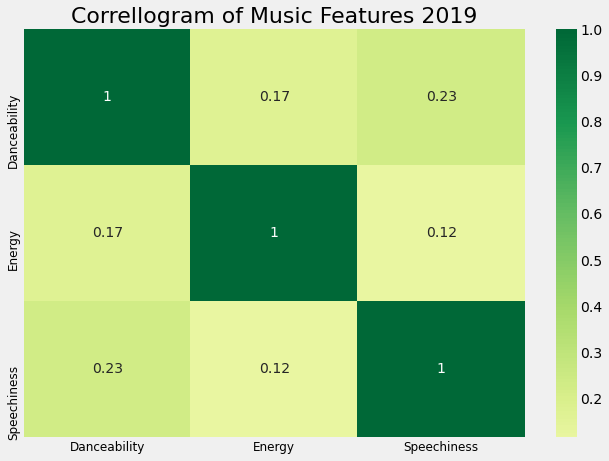

In [30]:
cleaned_df = original_spotify19_df.copy()
corr_music_features = cleaned_df[['Danceability', 'Energy', 'Speechiness']].corr()

fig,ax= plt.subplots(figsize=(10,7))
sns.heatmap(corr_music_features, xticklabels=corr_music_features.columns, yticklabels=corr_music_features.columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Correllogram of Music Features 2019', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('output_plots/Audio_Correllogram2019.png')
plt.show()

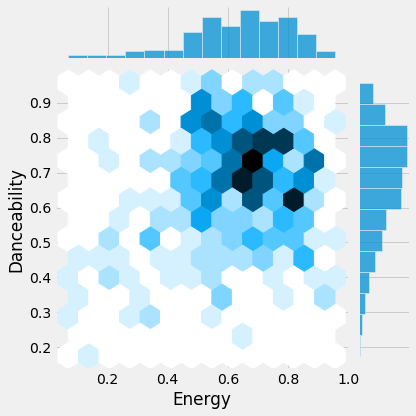

In [31]:
sns.jointplot(x='Energy', y='Danceability', data=cleaned_df[['Energy', 'Danceability']], kind="hex").set_axis_labels("Energy", "Danceability")
plt.savefig('output_plots/DanceabilityvsEnergy_2019.png')

In [32]:
cleaned_df_2 = original_spotify19_df.copy()

In [33]:
corr_music_features_2 = cleaned_df[['Danceability', 'Energy', 'Speechiness']].corr()

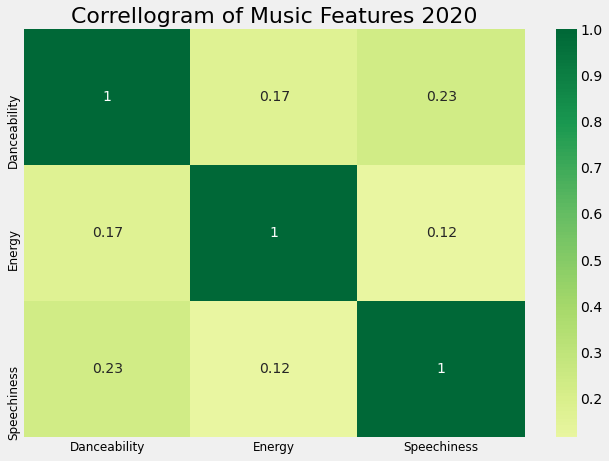

In [35]:
fig,ax= plt.subplots(figsize=(10,7))
sns.heatmap(corr_music_features_2, xticklabels=corr_music_features_2.columns, yticklabels=corr_music_features.columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Correllogram of Music Features 2020', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('output_plots/Audio_Correllogram2020.png')
plt.show()

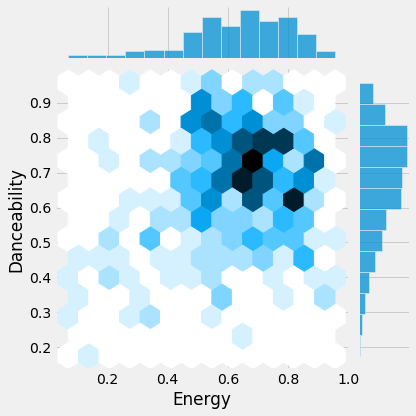

In [36]:
sns.jointplot(x='Energy', y='Danceability', data=cleaned_df_2[['Energy', 'Danceability']], kind="hex").set_axis_labels("Energy", "Danceability")
plt.savefig('output_plots/DanceabilityvsEnergy_2020.png')

### Sweden, Italy & USA Audio Analysis Plots

In [37]:
# Make copies of Data Frames
spotify_sweden = original_spotify_sweden_df.copy()
spotify_italy = original_spotify_italy_df.copy()
spotify_usa  = original_spotify20_df.copy()

# Filter Columns
spotify_usa_plot = spotify_usa[['Track Name', 'Artist', 'Week', 'Month', 'Year', 'Acousticness', 'Danceability', 'Energy', 
                             'Valence', 'Speechiness', 'Liveness', 'Instrumentalness']]
spotify_sweden_plot = spotify_sweden[['Track Name', 'Artist', 'Week', 'Month', 'Year', 'Acousticness', 'Danceability', 'Energy', 
                             'Valence', 'Speechiness', 'Liveness', 'Instrumentalness']]
spotify_italy_plot = spotify_italy[['Track Name', 'Artist', 'Week', 'Month', 'Year', 'Acousticness', 'Danceability', 'Energy', 
                             'Valence', 'Speechiness', 'Liveness', 'Instrumentalness']]

# USA data filtered
spotify_usa_feb = spotify_usa_plot[(spotify_usa_plot['Month'] == 'February')]
spotify_usa_mar = spotify_usa_plot[(spotify_usa_plot['Month'] == 'March')]
spotify_usa_apr = spotify_usa_plot[(spotify_usa_plot['Month'] == 'April')] #Data missing from dataframe

# Sweden data filtered
spotify_sweden_feb = spotify_sweden_plot[(spotify_sweden_plot['Month'] == 'February')]
spotify_sweden_mar = spotify_sweden_plot[(spotify_sweden_plot['Month'] == 'March')]
spotify_sweden_apr = spotify_sweden_plot[(spotify_sweden_plot['Month'] == 'April')]

# Italy data filtered
spotify_italy_feb = spotify_italy_plot[(spotify_italy_plot['Month'] == 'February')]
spotify_italy_mar = spotify_italy_plot[(spotify_italy_plot['Month'] == 'March')]
spotify_italy_apr = spotify_italy_plot[(spotify_italy_plot['Month'] == 'April')]

#USA first 6 Months
spotify_usa_6mo = spotify_usa_plot.loc[(spotify_usa_plot['Month']=='January') |
                              (spotify_usa_plot['Month']=='February') |
                              (spotify_usa_plot['Month']=='March') |
                              (spotify_usa_plot['Month']=='April') |
                              (spotify_usa_plot['Month']=='May') |
                              (spotify_usa_plot['Month']=='June')]

# USA February Top 50
usa_feb_week1 = spotify_usa_feb[spotify_usa_feb['Week']==1].iloc[:50]
usa_feb_week2 = spotify_usa_feb[spotify_usa_feb['Week']==2].iloc[:50]
usa_feb_week3 = spotify_usa_feb[spotify_usa_feb['Week']==3].iloc[:50]
usa_feb_week4 = spotify_usa_feb[spotify_usa_feb['Week']==4].iloc[:50]
usa_feb_top50 = usa_feb_week1.append([usa_feb_week2, usa_feb_week3, usa_feb_week4])

# Sweden February Top 50
sweeden_feb_week1 = spotify_sweden_feb[spotify_sweden_feb['Week']==1].iloc[:50]
sweeden_feb_week2 = spotify_sweden_feb[spotify_sweden_feb['Week']==2].iloc[:50]
sweeden_feb_week3 = spotify_sweden_feb[spotify_sweden_feb['Week']==3].iloc[:50]
sweeden_feb_week4 = spotify_sweden_feb[spotify_sweden_feb['Week']==4].iloc[:50]
sweeden_feb_top50 = sweeden_feb_week1.append([sweeden_feb_week2, sweeden_feb_week3, sweeden_feb_week4])

# Italy February Top 50
italy_feb_week1 = spotify_italy_feb[spotify_italy_feb['Week']==1].iloc[:50]
italy_feb_week2 = spotify_italy_feb[spotify_italy_feb['Week']==2].iloc[:50]
italy_feb_week3 = spotify_italy_feb[spotify_italy_feb['Week']==3].iloc[:50]
italy_feb_week4 = spotify_italy_feb[spotify_italy_feb['Week']==4].iloc[:50]
italy_feb_top50 = italy_feb_week1.append([italy_feb_week2, italy_feb_week3, italy_feb_week4])

#### Radar Charts

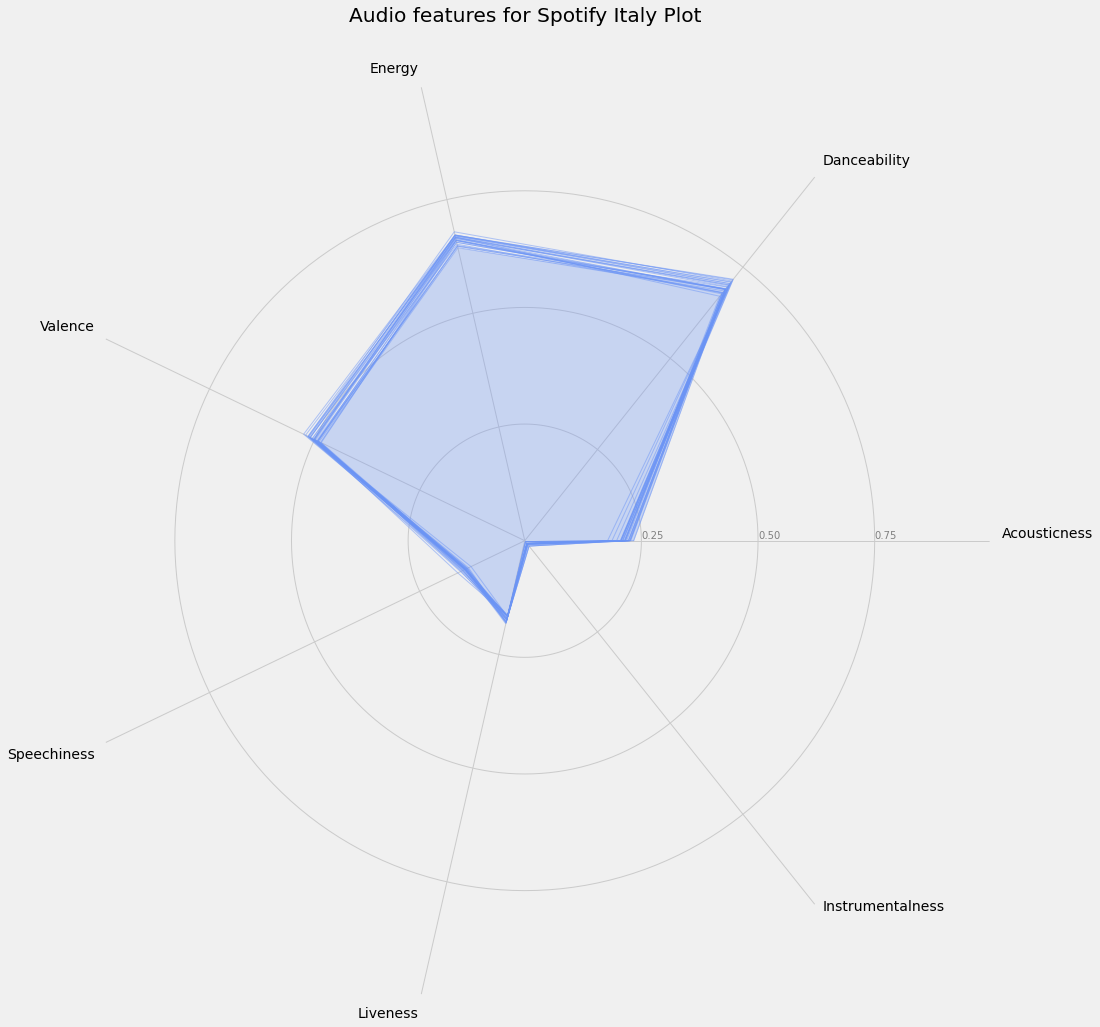

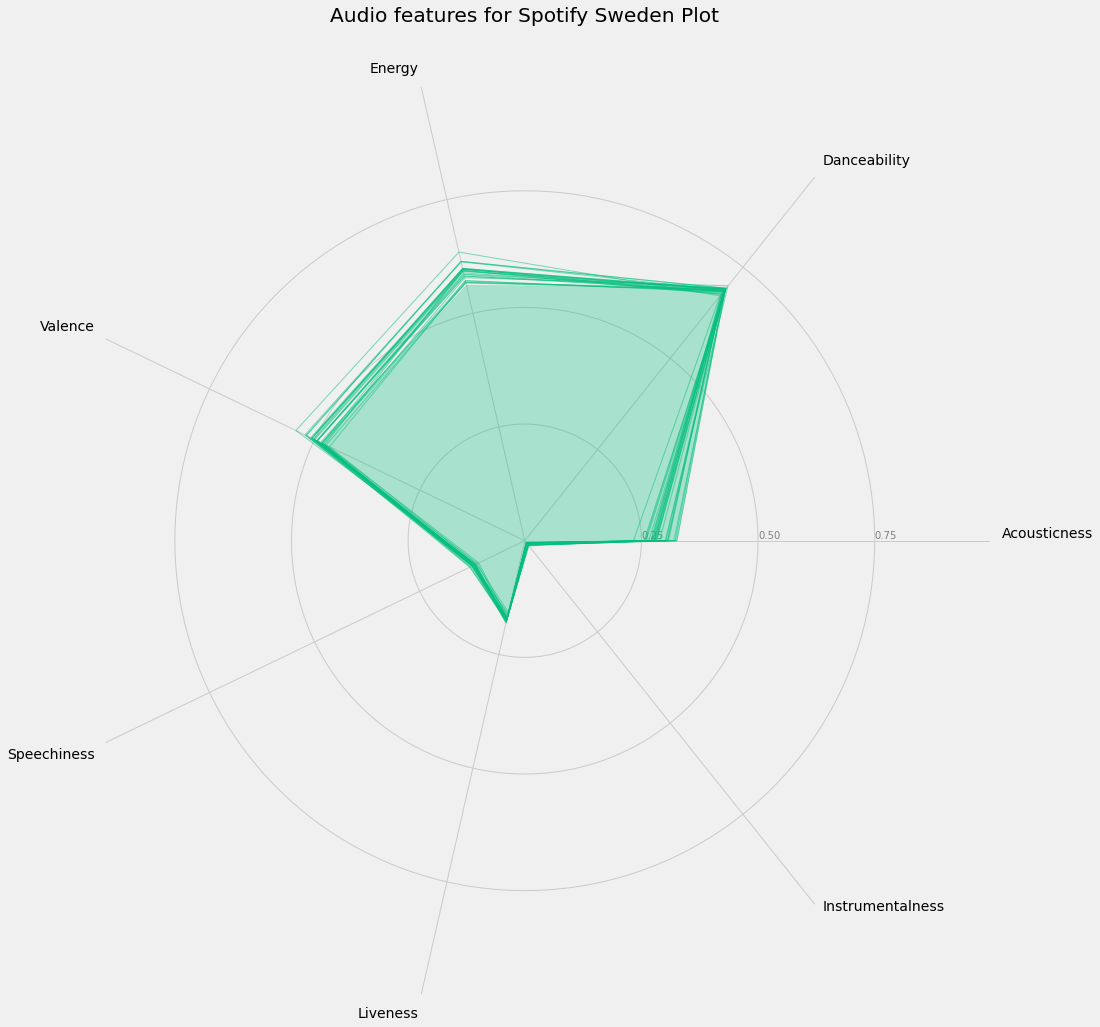

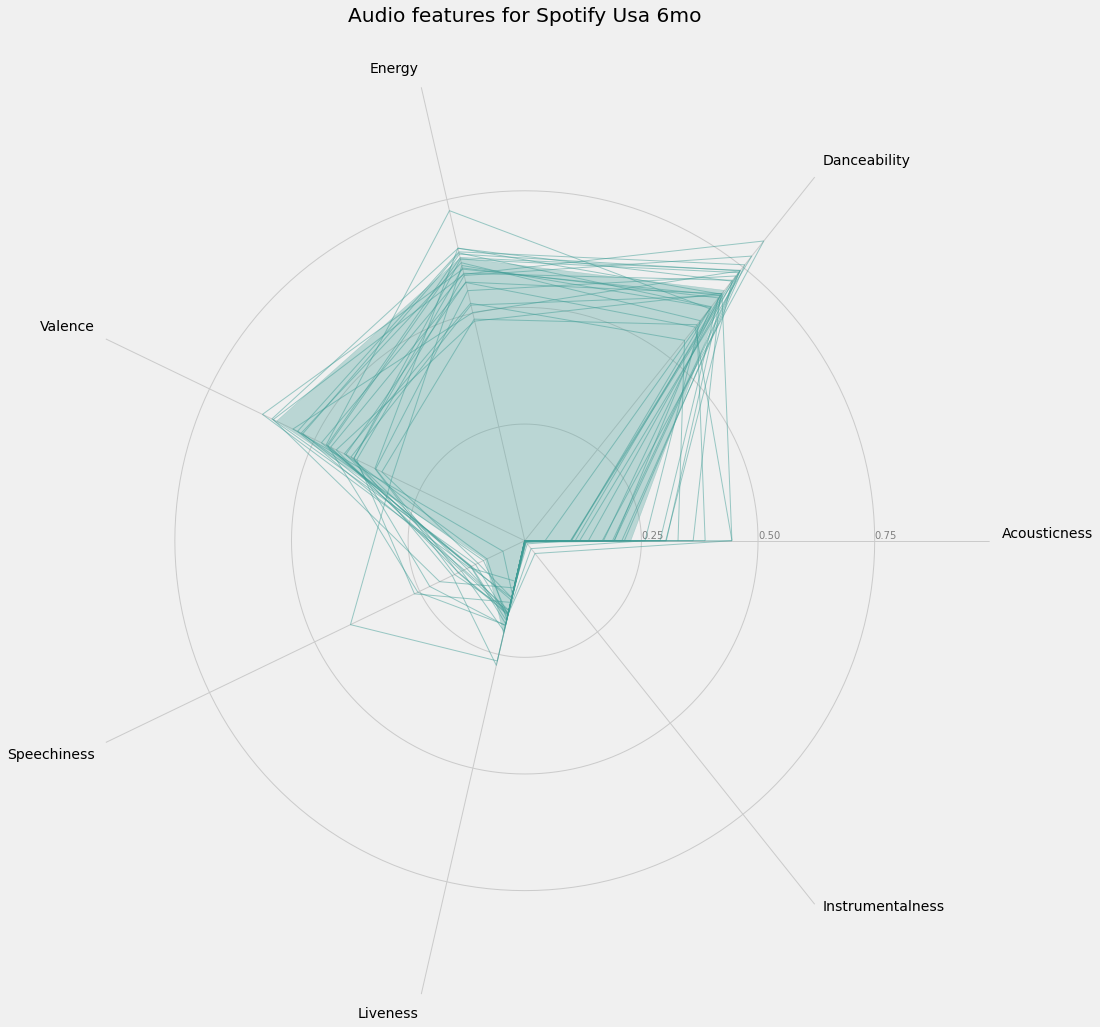

In [40]:
# Mood in 2020 in Sweden, Italy & USA
radar_plot(True, spotify_italy_plot, spotify_sweden_plot, spotify_usa_6mo)

#### Density Charts

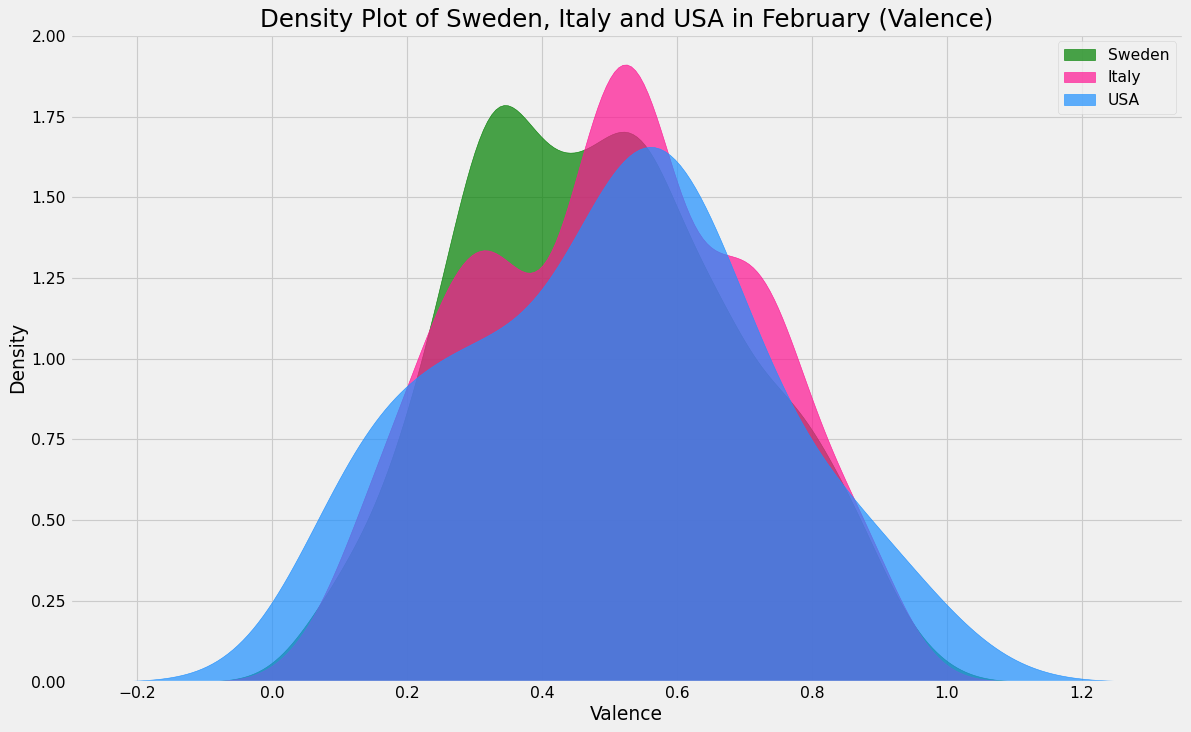

In [41]:
# Sweden, Italy and USA on February
density_plot(spotify_sweden, spotify_italy, spotify_usa_6mo, 'February', 'February', 'February', 'Sweden', 'Italy', 'USA', 'Valence', 'Density Plot of Sweden, Italy and USA in February (Valence)')

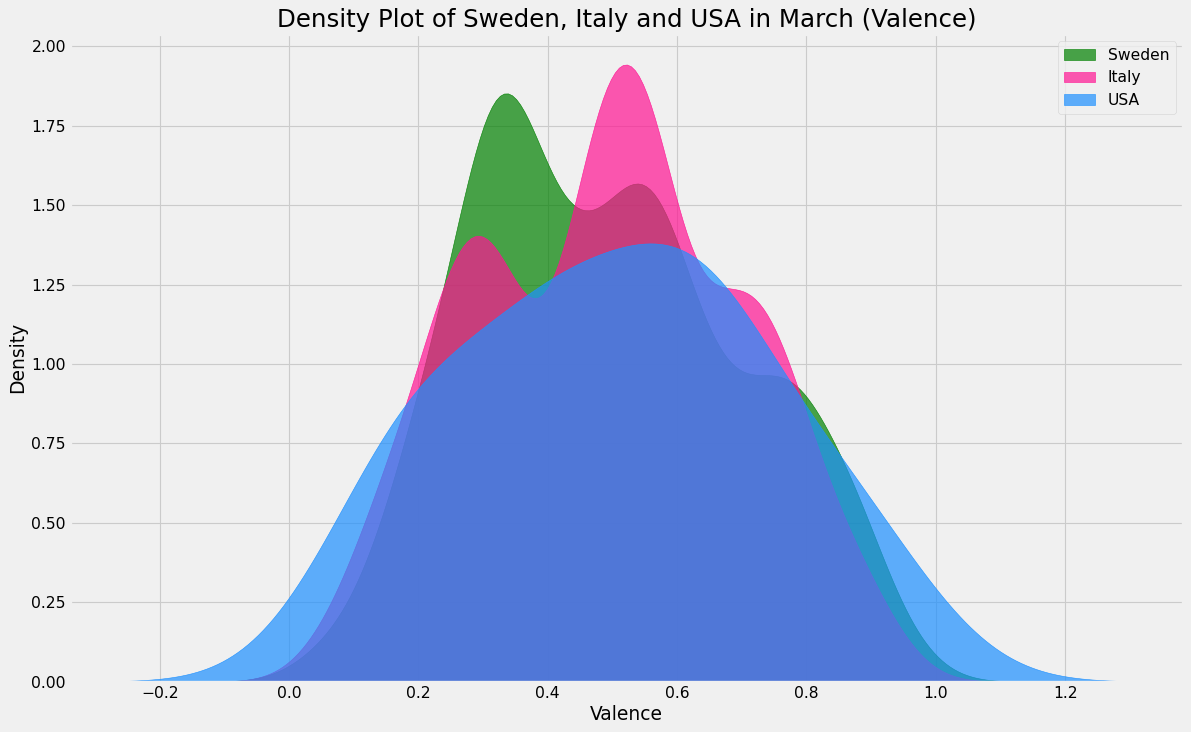

In [42]:
# Sweden, Italy and USA on March
density_plot(spotify_sweden, spotify_italy, spotify_usa_6mo, 'March', 'March', 'March', 'Sweden', 'Italy', 'USA', 'Valence', 'Density Plot of Sweden, Italy and USA in March (Valence)')

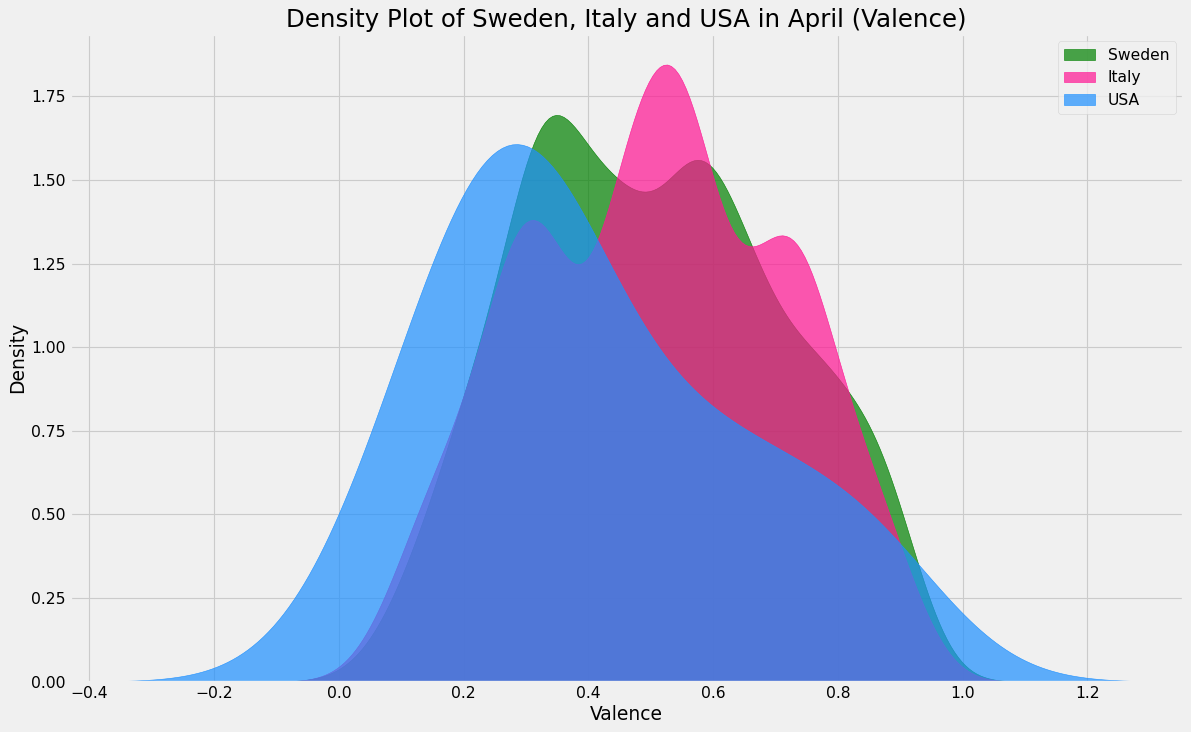

In [43]:
# Sweden, Italy and USA on April
density_plot(spotify_sweden, spotify_italy, spotify_usa_6mo, 'April', 'April', 'April', 'Sweden', 'Italy', 'USA', 'Valence', 'Density Plot of Sweden, Italy and USA in April (Valence)')

#### Bar Plot

In [44]:
# Calculate difference between the Mean Valence in Sweden and Italy
spotify_italy2 = pd.read_csv('output_data/Spotify_Italy_2020_Updated_2-20-21.csv')
spotify_sweden2 = pd.read_csv('output_data/Spotify_Sweden_2020_Updated_2-20-21.csv')


sweden_mean = []
italy_mean = []
sweden_diff = []
italy_diff = []
group_italy = spotify_italy2.groupby('Month', sort=False)
group_italy = group_italy.mean()
group_sweden = spotify_sweden2.groupby('Month', sort=False)
group_sweden = group_sweden.mean()

for sweden in group_sweden.index:
    sweden_mean.append(group_sweden.loc[sweden]['Valence'])
for italy in group_italy.index:
    italy_mean.append(group_italy.loc[italy]['Valence'])
    
zip_object = zip(sweden_mean, italy_mean)
for sweden_mean, italy_mean in zip_object:
        diff = sweden_mean - italy_mean
        if diff >= 0:
            sweden_diff.append(diff)
            italy_diff.append(0)
        elif diff < 0:
            sweden_diff.append(0)
            italy_diff.append(diff)

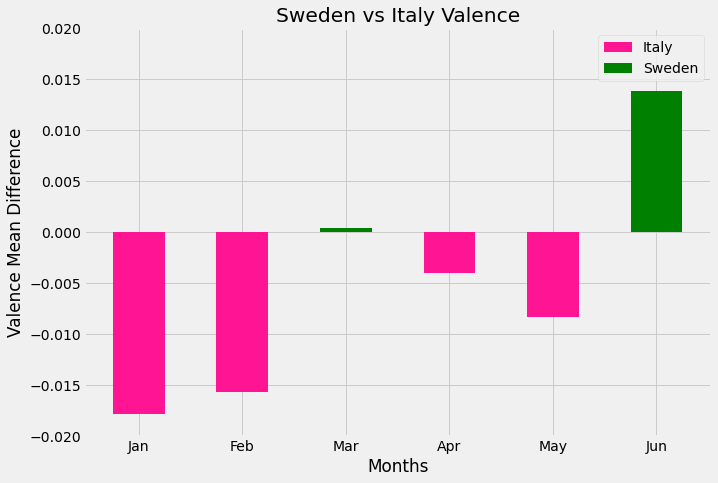

In [45]:
# Bar Plot of Italy vs Sweden
x = range(len(sweden_diff))

fig = plt.figure(figsize=(10,7))
plt.bar(x, italy_diff, width=0.5, color='deeppink')
plt.bar(x, sweden_diff, width=0.5, color='green')
labels = ['Italy', 'Sweden']
plt.ylim(-0.02, 0.02)
plt.title('Sweden vs Italy Valence')
plt.xticks([0, 1, 2, 3, 4, 5], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])
plt.xlabel('Months')
plt.legend(labels)
plt.ylabel('Valence Mean Difference')
plt.savefig('output_plots/Bar_Valence_Italy_Sweden.png')

### The Weeknd Plots

In [55]:
spotify_complete = pd.concat([spotify2020_df, spotify2021_df])
weeknd = spotify_complete.loc[spotify_complete['Artist'] == 'The Weeknd']
blinding_lights = pd.DataFrame(weeknd.loc[weeknd['Track Name'] == 'Blinding Lights'])
weeknd

#Create a column: Total Week Count to be used as x-axis
week_count = []
count = 0
for x in range(58):
    count += 1
    week_count.append(count)
blinding_lights['Total Week Count'] = week_count

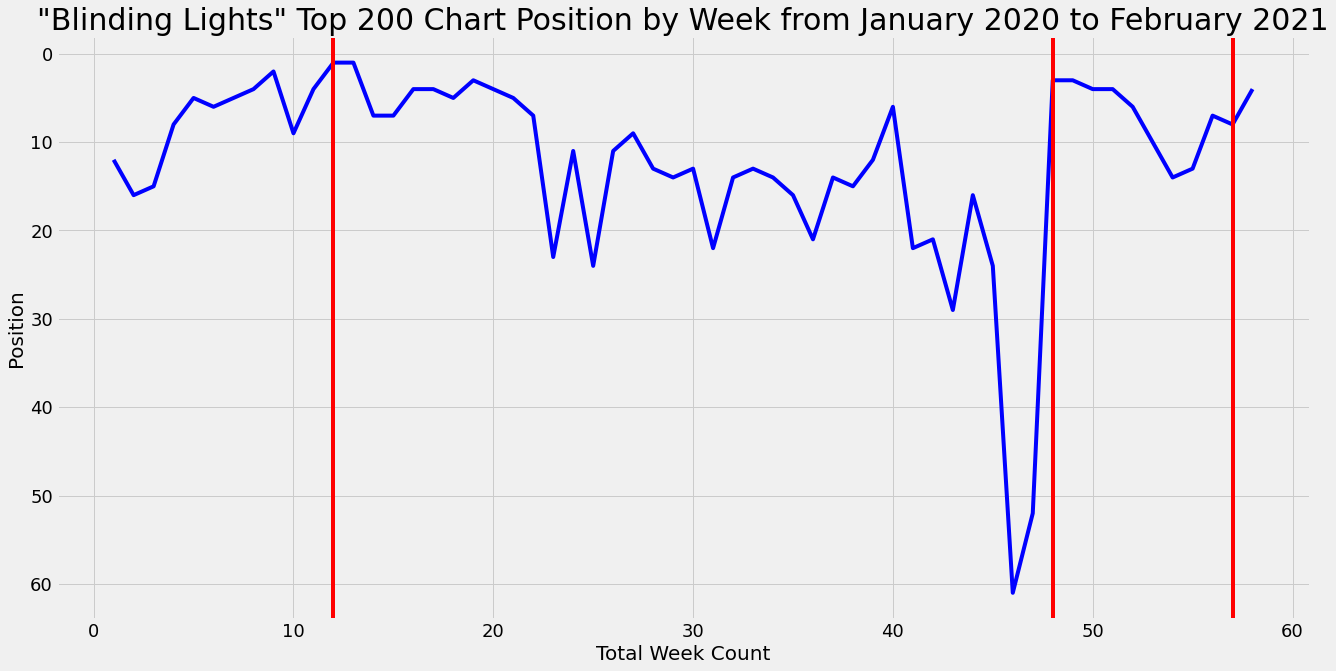

In [56]:
# Change Plot Font Color to White
plt.rcParams['text.color'] = 'Black'
plt.rcParams['axes.labelcolor'] = 'Black'
plt.rcParams['xtick.color'] = 'Black'
plt.rcParams['ytick.color'] = 'Black'
# Create Plots
plt.figure(figsize=(20, 10))
plt.plot(blinding_lights['Total Week Count'], blinding_lights['Position'], color='b')
plt.gca().invert_yaxis()
plt.xlabel('Total Week Count', fontsize=20)
plt.tick_params(axis='x', labelsize=18)
plt.ylabel('Position', fontsize=20)
plt.tick_params(axis='y', labelsize=18)
plt.axvline(12, color='r')
plt.axvline(48, color='r')
plt.axvline(57, color='r')
plt.title('"Blinding Lights" Top 200 Chart Position by Week from January 2020 to February 2021', fontsize=30)
plt.savefig('output_plots/blinding_lights_position_RM.png')
plt.show()

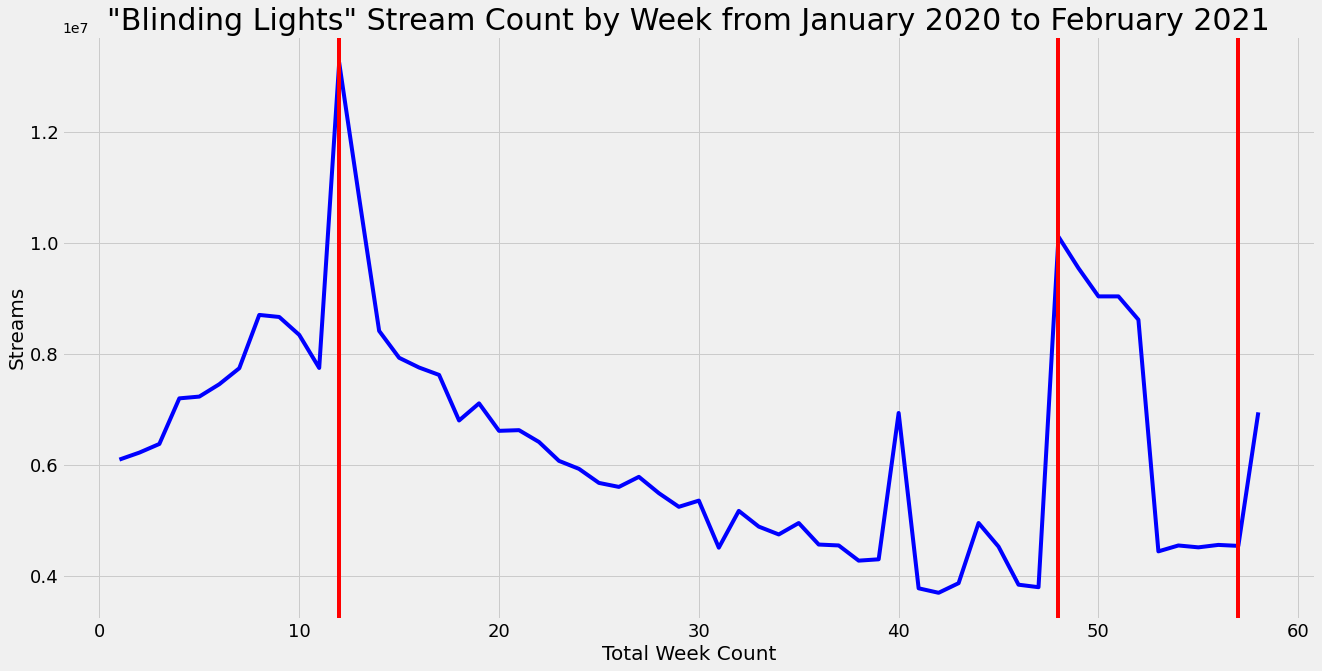

In [57]:
#------------------------------------------------------------------------------------------#
#        "Blinding Lights" Stream Count by Week from January 2020 to February 2021         #
#------------------------------------------------------------------------------------------#

plt.figure(figsize=(20, 10))
plt.plot(blinding_lights['Total Week Count'], blinding_lights['Streams'], color='b')
plt.xlabel('Total Week Count', fontsize=20)
plt.tick_params(axis='x', labelsize=18)
plt.ylabel('Streams', fontsize=20)
plt.tick_params(axis='y', labelsize=18)
plt.axvline(12, color='r')
plt.axvline(48, color='r')
plt.axvline(57, color='r')
plt.title('"Blinding Lights" Stream Count by Week from January 2020 to February 2021', fontsize=30)
plt.savefig('output_plots/blinding_lights_stream_count_RM.png')
plt.show()

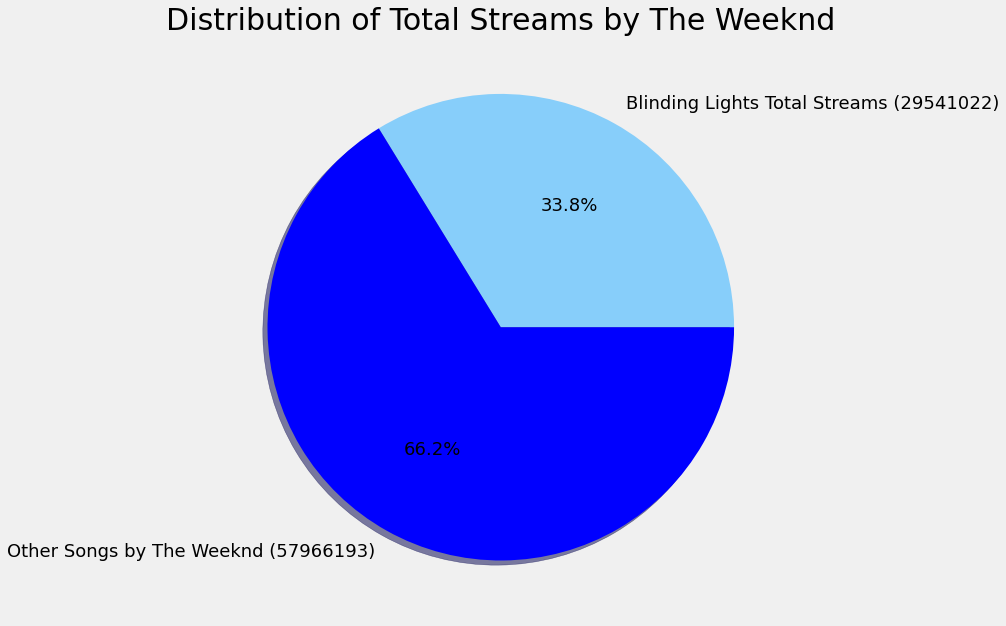

In [52]:
#---------------------------------------#
#       Blinding lights pie chart       #
#---------------------------------------#

# Create Variables to be used in pie chart
bl_sum = blinding_lights['Streams'].sum()
else_sum = weeknd['Streams'].sum() - bl_sum

# create piechart
comparison = [bl_sum, else_sum]
labels = [f'Blinding Lights Total Streams ({bl_sum})', f'Other Songs by The Weeknd ({else_sum})']
colors= ['lightskyblue', 'blue']
plt.figure(figsize=(20, 10))
plt.pie(comparison, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, textprops={'fontsize': 18})
plt.title('Distribution of Total Streams by The Weeknd', fontsize=30)
plt.savefig('output_plots/blinding_lights_pie_RM.png')
plt.show()